In [1]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
url="https://www.worldometers.info/gdp/india-gdp/"
response=requests.get(url)
content=response.content

In [4]:
soup=BS(content,'html.parser')
soup.title

<title>India GDP - Worldometer</title>

In [5]:
tables=soup.find_all('table')

In [7]:
table=tables[1]
table

<table class="table table-striped table-bordered table-hover table-condensed table-list"> <thead> <tr> <th>Year</th> <th>GDP Nominal<br/> (Current USD) </th> <th>GDP Real <br/> (Inflation adj.) </th> <th>GDP<br/> change</th> <th>GDP per capita</th> <th>Pop.<br/> change</th> <th>Population</th> </tr></thead> <tbody> <tr> <td>2022</td> <td style="font-weight: bold; text-align:right">$3,385,090,000,000</td> <td style="font-weight: bold; text-align:right">$2,954,980,000,000</td> <td style="font-weight: bold; text-align:right">7.00%</td> <td style="font-weight: bold; text-align:right">$2,085</td> <td style="text-align:right">0.68 %</td> <td style="font-weight: bold; text-align:right">1,417,173,173</td> </tr> <tr> <td>2021</td> <td style="font-weight: bold; text-align:right">$3,150,310,000,000</td> <td style="font-weight: bold; text-align:right">$2,761,590,000,000</td> <td style="font-weight: bold; text-align:right">9.05%</td> <td style="font-weight: bold; text-align:right">$1,962</td> <td s

In [11]:
if table:
    year_list=[]
    gdp_n_list=[]
    gdp_r_list=[]
    gdp_change_list=[]
    gdp_per_list=[]
    pop_list=[]
    pop_change_list=[]

    for row in table.find_all('tr')[1:]:
        columns=row.find_all('td')
        if len(columns)>=7:
            year=columns[0].get_text(strip=True)
            gdp_n=columns[1].get_text(strip=True)
            gdp_r=columns[2].get_text(strip=True)
            gdp_c=columns[3].get_text(strip=True)
            gdp_p=columns[4].get_text(strip=True)
            pop_c=columns[5].get_text(strip=True)
            pop=columns[6].get_text(strip=True)

            year_list.append(year)
            gdp_n_list.append(gdp_n)
            gdp_r_list.append(gdp_r)
            gdp_change_list.append(gdp_c)
            gdp_per_list.append(gdp_p)
            pop_list.append(pop)
            pop_change_list.append(pop_c)

    data={
        'Year':year_list,
        'GDP Nominal':gdp_n_list,
        'GDP Real':gdp_r_list,
        'GDP Change':gdp_change_list,
        'GDP Per Capita':gdp_per_list,
        'Population C':pop_change_list,
        'Population':pop_list

    }
    df=pd.DataFrame(data)

else:
    print("Table Not Found")


,Year,GDP Nominal,GDP Real,GDP Change,GDP Per Capita,Population C,Population
0,2022,"$3,385,090,000,000","$2,954,980,000,000",7.00%,"$2,085",0.68 %,"1,417,173,173"
1,2021,"$3,150,310,000,000","$2,761,590,000,000",9.05%,"$1,962",0.80 %,"1,407,563,842"
2,2020,"$2,671,600,000,000","$2,532,400,000,000",-5.83%,"$1,814",0.96 %,"1,396,387,127"
3,2019,"$2,835,610,000,000","$2,689,210,000,000",3.87%,"$1,944",1.03 %,"1,383,112,050"
4,2018,"$2,702,930,000,000","$2,588,970,000,000",6.45%,"$1,891",1.09 %,"1,369,003,306"
5,2017,"$2,651,470,000,000","$2,432,020,000,000",6.80%,"$1,796",1.16 %,"1,354,195,680"
6,2016,"$2,294,800,000,000","$2,277,270,000,000",8.26%,"$1,701",1.19 %,"1,338,636,340"
7,2015,"$2,103,590,000,000","$2,103,590,000,000",8.00%,"$1,590",1.19 %,"1,322,866,505"
8,2014,"$2,039,130,000,000","$1,947,830,000,000",7.41%,"$1,490",1.25 %,"1,307,246,509"
9,2013,"$1,856,720,000,000","$1,813,450,000,000",6.39%,"$1,405",1.31 %,"1,291,132,063"


In [21]:
df['GDP Nominal']=df['GDP Nominal'].str.replace(',','')
df['GDP Nominal']=df['GDP Nominal'].astype(float)

In [22]:
df['Population']=df['Population'].str.replace(',','')
df['Population']=df['Population'].astype(float)

In [32]:
df['Year']=df['Year'].astype(float)

In [17]:
df.head()


,Year,GDP Nominal,GDP Real,GDP Change,GDP Per Capita,Population C,Population
0,2022,3385090000000,"$2,954,980,000,000",7.00%,"$2,085",0.68 %,1417173173
1,2021,3150310000000,"$2,761,590,000,000",9.05%,"$1,962",0.80 %,1407563842
2,2020,2671600000000,"$2,532,400,000,000",-5.83%,"$1,814",0.96 %,1396387127
3,2019,2835610000000,"$2,689,210,000,000",3.87%,"$1,944",1.03 %,1383112050
4,2018,2702930000000,"$2,588,970,000,000",6.45%,"$1,891",1.09 %,1369003306


Text(0, 0.5, 'GDP')

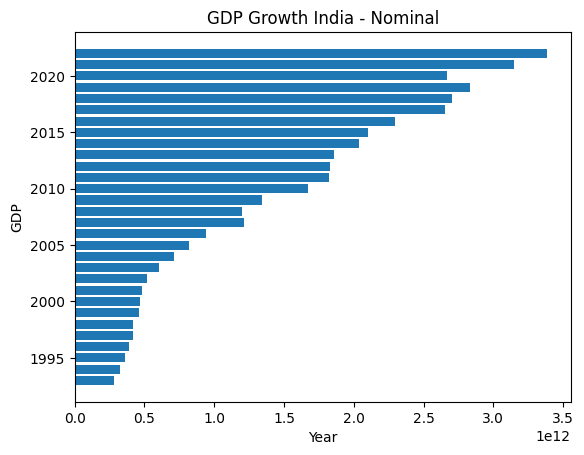

In [33]:
x=df['Year']
y=df['GDP Nominal']
plt.barh(x,y)

plt.title("GDP Growth India - Nominal")
plt.xlabel("Year")
plt.ylabel("GDP")



Text(0, 0.5, 'Population')

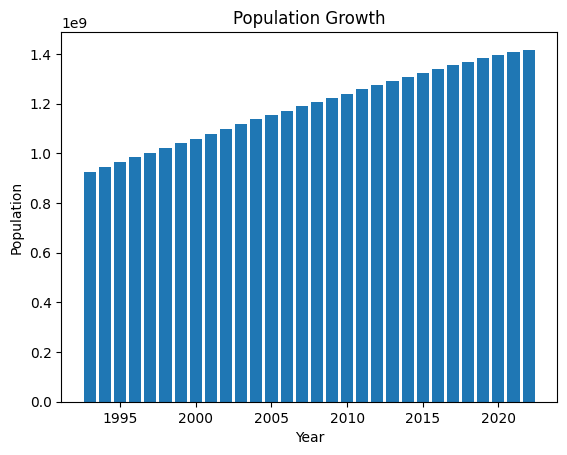

In [38]:
a=df['Year']
b=df['Population']
plt.bar(a,b)

plt.title("Population Growth")
plt.xlabel("Year")
plt.ylabel("Population")